In [9]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipyfilechooser import FileChooser
import netCDF4 as nc
import os
from ipywidgets import TwoByTwoLayout

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
import traitlets
from ipywidgets import widgets
from IPython.display import display
from tkinter import Tk, filedialog

In [ ]:
class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self):
        super(SelectFilesButton, self).__init__()
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.

        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button 
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"

In [ ]:
fn = 'data/grace_nc/GRD-3_2002094-2002120_GRAC_JPLEM_BA01_0600_LND_v04.nc'
ds = nc.Dataset(fn)

In [ ]:
print(ds)

In [ ]:
lwe = ds['lwe_thickness']
print(lwe)

In [ ]:
lon = ds['lon']

In [ ]:
fig=plt.plot()
plt.axis('off')


In [ ]:

class toolbox(widgets.HBox):
     
    def __init__(self):
        super().__init__()
        output = widgets.Output()
        # create figure
        with output:
            fig=plt.plot()
            plt.axis('off')
        # define widgets
        fileuploader = FileChooser()
        layerselector = widgets.Dropdown()
        plot_button = widgets.Button(description='Plot')


                           
        controls = widgets.VBox([
            fileuploader,
            plot_button
        ])

        app = TwoByTwoLayout(top_left=controls, top_right=output)

        # observe stuff
        fileuploader.observe(self.update, 'value')
         
        # add to children
        self.children = [controls, output]
     
    def update(self, change):
        """Draw line in plot"""
        self.fig.canvas.draw()
 
         

toolbox()

In [ ]:
class Toolbar:
    def __init__(self):
        self.create_widgets()
        self.setup_interactive_plot()
        map_output = widgets.Output()
        plot_output = widgets.Output()
        self.fileuploader.observe(self.open_file, names='files')

        with map_output:
            map_output.clear_output()
            fig=plt.plot()
            plt.axis('off')

        with plot_output:
            plot_output.clear_output()
            fig=plt.plot()
            plt.axis('off')   

    ## create buttons
    def create_widgets(self):
        self.fileuploader = SelectFilesButton()
        self.plot_button = widgets.Button(description="Plot")
        self.save_button = widgets.Button(description="Save")
        self.plot_button.on_click(self.plot)
        self.save_button.on_click(self.save)
        self.layerselector = widgets.Dropdown(
            options=["No file uploaded"],
            value=None,
            description="Layer:"
        )
    
    ## define toolbar layout
    def setup_interactive_plot(self):
        display(self.fileuploader, self.layerselector, self.plot_button, self.save_button)
    
    ## define dropdown uppdate event
    def update_dropdown(self):
        self.layerselector.options = self.ds_list
        self.layerselector.value = self.ds_list[0]

    ## define open file event
    def open_file(self, event=None):
        init_ds = self.fileuploader.files[0]
        if init_ds.endswith(".nc"):
            self.ds = nc.Dataset(path)
            self.ds_list = self.fileuploader.files
            self.update_dropdown()
        elif init_ds.endswith(".tif"):
            self.ds = gdal.Open(path)
            self.ds_list = self.fileuploader.files
            self.update_dropdown()
        else:
            print("File type not supported")
        
    def plot(self, event=None):
        plt.figure()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        plt.plot(x, y)
        plt.show()

    def save(self, event=None):
        plt.savefig(f"test.png", dpi=600)
        print(f"Plot saved as test.png")


Toolbar()

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle())

Dropdown(description='Layer:', options=('No file uploaded',), value=None)

Button(description='Plot', style=ButtonStyle())

Button(description='Save', style=ButtonStyle())

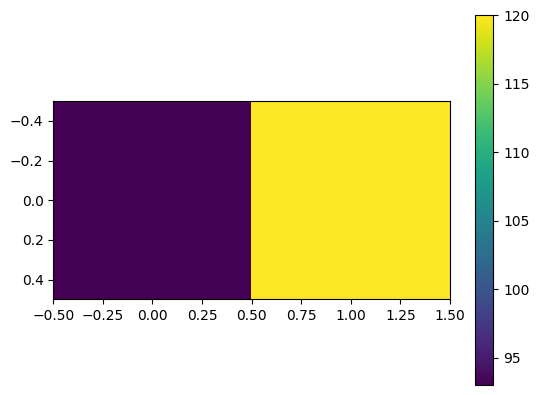

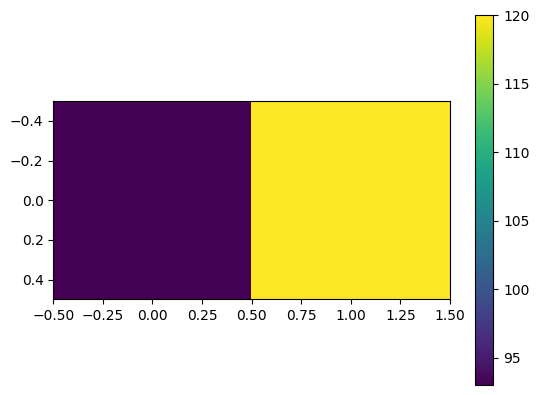

In [8]:

class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self):
        super(SelectFilesButton, self).__init__()
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.

        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button 
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"

class Toolbar:
    def __init__(self):
        self.create_widgets()
        self.setup_interactive_plot()

        # Observe the changes in the fileuploader.files and call open_file
        self.fileuploader.observe(self.open_file, names='files')

    ## create buttons
    def create_widgets(self):
        self.fileuploader = SelectFilesButton()
        self.plot_button = widgets.Button(description="Plot")
        self.save_button = widgets.Button(description="Save")
        self.plot_button.on_click(self.plot)
        self.save_button.on_click(self.save)
        self.layerselector = widgets.Dropdown(
            options=["No file uploaded"],
            value=None,
            description="Layer:"
        )

    ## define toolbar layout
    def setup_interactive_plot(self):
        display(self.fileuploader, self.layerselector, self.plot_button, self.save_button)

    ## define open file event
    def open_file(self, change):
        self.ds_list = self.fileuploader.files
        self.update_dropdown()

    def update_dropdown(self):
        if len(self.ds_list) > 0:
            self.layerselector.options = self.ds_list
            self.layerselector.value = self.ds_list[0]
        else:
            self.layerselector.options = ["No file uploaded"]
            self.layerselector.value = None

    def read_and_plot_file(self, file_path):
        if file_path.endswith(".nc"):
            ds = nc.Dataset(file_path)
            lat = ds.variables['latitude'][:]
            lon = ds.variables['longitude'][:]
            data = ds.variables[var][:]
            lons,lats= np.meshgrid(lon-180,lat)

        elif file_path.endswith(".tif"):
            with rasterio.open(file_path) as ds:
                data = ds.read(1)  # Assume you want to read the first band
        else:
            print("File type not supported")
            return
        
        plt.figure()
        map = Basemap()
        plt.show()

    def plot(self, event=None):
        selected_file = self.layerselector.value
        self.read_and_plot_file(selected_file)

    def save(self, event=None):
        plt.savefig(f"test.png", dpi=600)
        print(f"Plot saved as test.png")

toolbar = Toolbar()
